Quando investiamo in azioni in realtà ci stiamo esponedo a dei rischi che vengono premiati. Questi rischi possono essere espressi in fattori. 

Una analogia carina è quella di pensare ai fattori come ai composti nutrienti di un cibo. Siamo interessati a mangiare bene per non avere problemi di salute.

Stesso ragiornamento dovrebbe essere seguito con i fattori.

Ora esistono due classi importanti di fattori:

* Fattori **Macro Economici** che hanno in impatto diretto su tutto il portafoglio ad esempio:
    * Pil
    * Inflazione
* Fattori **Micro Economici** che hanno in impatto specifico per una classe di azioni ad esempio:
    * Dimensione
    * Bassa volatilità
    
Ora quali sono i vantaggi dell'investimento fattoriale?

Uno dei principali vantaggi è quello della diversificazione del rischio, infatti molto spesso portafogli che sembrano ben diversificati in realtà gravano su una serie limitata di fattori.

## Modello di mercato

Il modello è il modello più semplice e immediato valuta l'eccesso di rendimento rispetto alle obbligazioni a breve termine:

$$
    R_i - rf = \alpha_i + \beta_i \left[ R_m - R_f \right] + \epsilon_i
$$

Possiamo vedere $\beta_i$ come l'esposizione del titolo rispetto ai rendimenti di mercato $R_m$, $\epsilon_i$ rappresenta i residuali.

Una particolare attenzione viene data al termine $\alpha_i$ che viene anche definito come rendimento anomalo.
Se non teniamo conto di $\alpha$ possiamo scomporre la varianza del nostro asset come:

$$
    \sigma_i^{2} = \beta_i^2 \sigma_m^{2} + \sigma_{\epsilon_i}^{2}
$$

Questa formula scompone il rischio in due parti la prima viene detta rischio sistematico mentre la seconda parte è anche detta rischio specifico.

Possiamo usare questo per calcolare il potere esplicativo del modello fattoriale o $R^2$:

$$
    R^2 = \frac{\beta_i^2 \sigma_m^{2}}{\sigma_{\epsilon_i}^{2}}
$$

Ora possiamo estendere questo tipo di analisi a più fattori.

## Dal modello di mercato al modello multifattoriale

Siamo davvero sicuri che l'unico fattore sia il mercato, come abbiamo già visto questi non sono gli unici fattori, altri fattori importanti sono:

* Fattore dimensione correlato alla capitalizzazione di mercato
* Fattore value che è correlato al book to value (P/B)

Altri fattori interessanti sono:

* Momentum 
* Bassa volatilità
* Liquidità

## Usare i modelli fattoriali

Uno dei primi passaggi da eseguire ora è, come stimare questi parametri?
La prima cosa che possiamo fare e provare a stimarli usando python ma quello che succederebbe è che non avremmo nessuna voglia di investire...

Specialmenti per i parametri del rendimento atteso che sono molto sensibili al rumore.
La prima cosa che faremo è utilizzare il modello capm per la stima del rendimento, i parametri $\alpha$ e $\beta$ visti prima.

Utilizzeremo poi le stime di $\alpha$ e $\beta$ per ottenere una stima del rendimento atteso:

$$
    E\left(R_i\right) = r_f + \hat{\beta} \left( E(R_m) - r_f \right)
$$

Come si può notare impostiamo implicitamente $\alpha$ a 0.

Ora possiamo fare la stessa cosa su un modello multifattoriale. 
Incorriamo però nel problema della maledizione delle dimensionalità che penalizza il modello.

## Impostazione del modello fattoriale e primi risultati

Se $y_t$ rappresenta il rendimento dell'asset al tempo $t$ il modello lineare ci può aiutare a comprendere i fattori di rendimento. Nel particolare useremo il modello a 5 fattori composto nel seguente modo:

* Azionario Globale, useremo l'indice MSCI All World che valuta il mercato globale per capitalizzazione
* Obbligazioni del tesoro a 10 anni, useremo il rendimento delle obbligazioni del tesoro americane a 10 anni
* Alto rendimento: useremo l'indice BOFA Merrill Lynch Global High Yield Index 
* Protezione dall'inflazione: questo è un fattore di stile che considera la differenza tra i rendimenti reali e nominali, questo si misura con il rendiment dei TIPS  (Treasury Inflation-Protected Securities) meno la media pesata dei Treasurary Bonds.
* Protezione della valuta: è un fattore sul tasso di cambio che misura il valore del dollaro rispetto ad un paniere di monete estere.

Le prime tra variabili sono dei surrogati per per la determinazione del prezzo degli asset, gli ultimi due sono considerati per gli investimenti internazionali (protezione valutaria) e per comprendere gli effetti dell'inflazione.

Potremmo chiederci perchè questo modello funziona, qui entra in campo il paradosso di Stein che di dice che in presenza di più di due variabili contemporanee per stimare il valore di una sola variabile usare la media delle tre produce un risultato migliore.

Iniziamo importando i dati

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import r2_score

In [3]:
data_file = './data/Data2016.csv'
all_data = pd.read_csv(data_file,index_col='Date')
all_data.index = pd.to_datetime(all_data.index)
all_data = all_data[all_data.index <= '2014-12-01'].copy()
all_data

C:\Users\DalFornoF\AppData\Local\Temp\ipykernel_13324\2594520702.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data.index = pd.to_datetime(all_data.index)


,World Equities,10-year US Treasuries,High Yield,Inflation Protection,Currency Protection,U.S. Equity,SP500 Total Return,S&P 500,International Equity,U.S. Treasury 20 years,Corporate Bond,Real Estate,Commodity,TIPS
Date,,,,,,,,,,,,,,
1995-01-01,-0.020349,0.022922,0.032048,0.006524,-0.003404,0.022239,0.025954,0.025897,-0.039228,0.025987,0.017042,-0.014847,-0.023908,0.029446
1995-02-01,0.010680,0.030014,0.013531,-0.038375,-0.020587,0.036258,0.035540,0.038974,-0.000434,0.026960,0.029870,0.032460,0.002221,-0.008361
1995-03-01,0.045804,0.007195,0.025871,-0.023184,-0.042060,0.030791,0.035454,0.029502,0.061949,0.009477,0.011937,-0.005961,0.019558,-0.015989
1995-04-01,0.036372,0.016973,0.030836,-0.003600,-0.015827,0.022403,0.026256,0.029414,0.037154,0.017695,0.010995,0.002259,0.038085,0.013373
1995-05-01,0.011040,0.054900,0.006743,-0.054282,0.009121,0.036521,0.040894,0.039949,-0.009769,0.076715,0.053217,0.045025,-0.009417,0.000618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-08-01,0.027793,0.018782,-0.020976,-0.014430,0.009927,0.043745,0.042988,0.037655,0.008299,0.038171,0.012999,0.035689,-0.009703,0.004352
2014-09-01,-0.042745,-0.010631,0.011383,-0.014319,0.039788,-0.033391,-0.026997,-0.015514,-0.048614,-0.015959,-0.006966,-0.055390,-0.062227,-0.024950
2014-10-01,0.013016,0.013129,-0.007149,-0.004635,0.009673,0.041572,0.037970,0.023201,-0.019297,0.027575,0.003061,0.093608,-0.064498,0.008494


Visualizziamo il rendimento dell'indice SP500

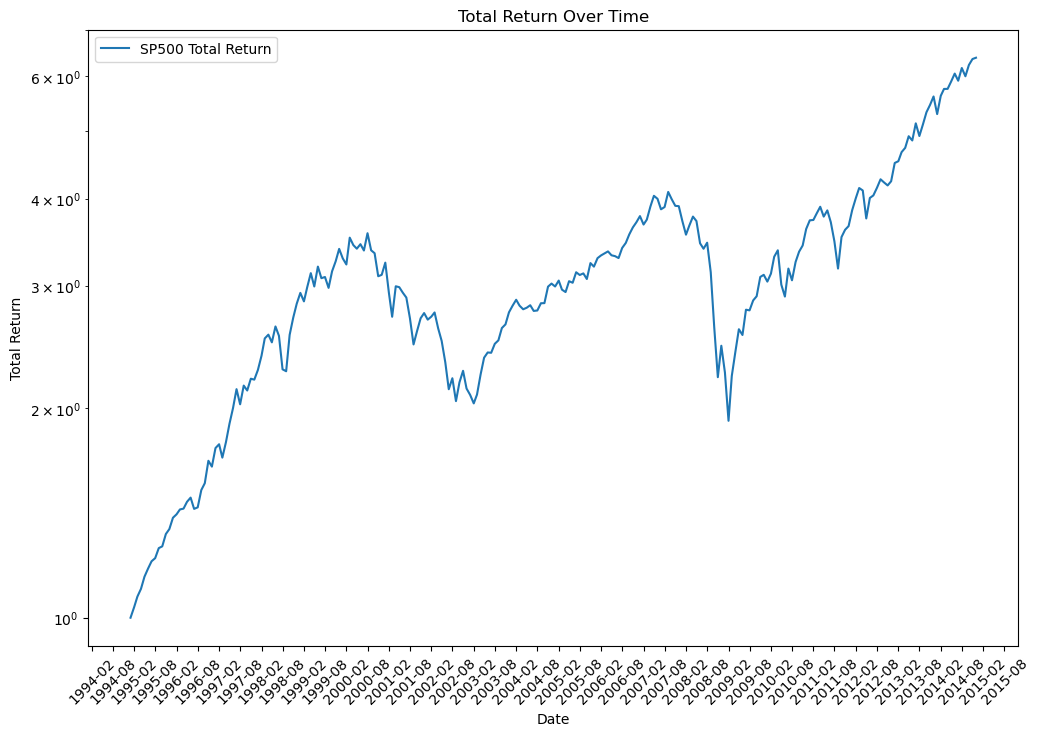

In [4]:
from utils import plot_returns


name = 'SP500 Total Return'
plot_returns(all_data,name)

Analizziamo un pochino i dati ordiniamo per i valori dell'indice SP500 dal più piccolo al più grande 

In [5]:
import pandas as pd

pd.options.display.float_format = "{:,.3f}".format
all_data.sort_values('SP500 Total Return').head(3)

,World Equities,10-year US Treasuries,High Yield,Inflation Protection,Currency Protection,U.S. Equity,SP500 Total Return,S&P 500,International Equity,U.S. Treasury 20 years,Corporate Bond,Real Estate,Commodity,TIPS
Date,,,,,,,,,,,,,,
2008-10-01,-0.194,-0.029,-0.084,-0.058,0.087,-0.173,-0.166,-0.168,-0.205,-0.036,-0.070,-0.312,-0.295,-0.087
2008-11-01,-0.132,0.085,0.075,-0.078,0.006,-0.163,-0.152,-0.072,-0.112,0.144,0.045,-0.337,-0.176,0.007
2009-02-01,-0.131,-0.002,0.033,-0.018,0.028,-0.148,-0.148,-0.106,-0.127,-0.004,-0.019,-0.269,-0.097,-0.020


questi tre valori fanno parte della [grande crisi finaziaria del 2008](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%932008).

## Regressione OLS

Torniamo al modello fattoriale, costruire un modello fattoriale equivale a risolvere l'equzione per trovare i fattori di carico $\beta$ in base al seguente problema di minimizzazione:
$$
\begin{equation*} 
    \hat{\beta}^{\text{OLS}} = argmin_{\beta}\bigg\{\sum_{t=1}^{n} (y_t - {X_t}^T {\bf \beta})^2 \bigg\}
\end{equation*}
$$
Questo problema può essere affrontato in forma chiusa
$$
\begin{equation*} 
    \hat{\beta}^{\text{OLS}} = ({\bf X}^\intercal {\bf X})^{-1} {\bf X}^\intercal{\bf Y}
\end{equation*}
$$

Con ${\bf Y}$ è il vettore rappresentante $y_t$ e ${\bf X}$ rappresentante la matrice $X_t$ 

Diamo una occhiata ai termini $\hat{\beta}$ detti anche fattori di carico, cosa rappresentano? Rappresentano l'effetto della variabile dipendente in questo caso il rendimento rispetto al fattore sottostante.

Più avanti useremo le librerie scikit learn ma visto che esiste la forma chiusa possiamo usarla per approcciare di primo acchitto il problema.

In [6]:
startDate = all_data.index.min()
endDate = all_data.index.max()

In [7]:
factorName = ['World Equities', '10-year US Treasuries', 'High Yield', 'Inflation Protection', 'Currency Protection']
assetName = ['SP500 Total Return','International Equity','U.S. Treasury 20 years', 'Corporate Bond','Real Estate', 'Commodity', 'TIPS']

In [8]:
Factors = all_data[factorName].values
Assets = all_data[assetName].values

In [9]:
Asset_RE = Assets[:,0]
Factors_ones = np.concatenate((np.ones((all_data.shape[0],1)),Factors),axis=1)
theory_beta = np.linalg.inv(Factors_ones.T.dot(Factors_ones)).dot(Factors_ones.T).dot(Asset_RE)

In [10]:
from utils import display_factor_loadings

print('Dependent variable is SP500 Total Return')
print('Historical Timeperiods ' +  startDate.strftime('%B') +  " " + str(startDate.year) + " "
      + endDate.strftime('%B') +  " " + str(endDate.year))

display_factor_loadings(theory_beta[0], theory_beta[1:],factorName)

Dependent variable is SP500 Total Return
Historical Timeperiods January 1995 December 2014


,Intercept,World Equities,10-year US Treasuries,High Yield,Inflation Protection,Currency Protection
Beta,0.001,1.021,0.128,-0.004,-0.011,0.397


Eseguiamo la regressione usando la libreria sklearn

In [11]:
from sklearn.linear_model import LinearRegression

linReg = LinearRegression(fit_intercept=True)
linReg.fit(Factors, Asset_RE)

display_factor_loadings(linReg.intercept_, linReg.coef_, factorName)

,Intercept,World Equities,10-year US Treasuries,High Yield,Inflation Protection,Currency Protection
Beta,0.001,1.021,0.128,-0.004,-0.011,0.397


Come si vede il codice funziona perfettamente

### Limiti del metodo OLS

Come sappiamo questo metodo è notoriamente  instabile, in particolare i carichi fattoriali prodotti non sono utilizzabili per le stime sui rendimenti. Questo per due ragioni:

1) C'è una elevata correlazione tra i vari fattori (non spiegato qui) che porta ad avere un alto valore dello standard error sui fattori di carico. Per gestire questo problema viene usata la Ridge Regression che vedremo più avanti.

2) Il metodo OLS non ha consapevolezza del regime, i fattori non sono costanti nel tempo. Se potessimo studiare i carichi fattoriali durante i vari regimi le nostre stime sarebbero più veritiere 


Va considerato il problema dell'overfitting all'aumentare del numero di fattori, specialmente quando supera di gran lunga il numero delle categorie di assett.


#### Correlazione tra i fattori

Analizziamo la correlazione tra i vari fattori

In [12]:
all_data[factorName].corr()

,World Equities,10-year US Treasuries,High Yield,Inflation Protection,Currency Protection
World Equities,1.000,-0.176,0.308,0.332,-0.528
10-year US Treasuries,-0.176,1.000,0.131,-0.616,-0.140
High Yield,0.308,0.131,1.000,0.005,-0.185
Inflation Protection,0.332,-0.616,0.005,1.000,-0.209
Currency Protection,-0.528,-0.140,-0.185,-0.209,1.000


Vediamo che esiste una correlazione negativa tra Inflation Protection e 10-year US Treasuries

#### Dipendenza da regime


Vadiamo come variano i coefficienti di carico nelle varie condizioni di mercato in crescita:

In [13]:
normal_data = all_data[all_data['SP500 Total Return'] > 0].copy()

Factors = normal_data[factorName].values
Assets = normal_data[assetName].values
Asset_RE = Assets[:,0]

linReg = LinearRegression(fit_intercept=True)
linReg.fit(Factors, Asset_RE)

display_factor_loadings(linReg.intercept_, linReg.coef_, factorName, 'Beta Norm')

,Intercept,World Equities,10-year US Treasuries,High Yield,Inflation Protection,Currency Protection
Beta Norm,0.007,0.913,0.201,0.025,-0.003,0.388


Eseguiamo la stessa analisi in condizioni di mercato sfavorevole

In [14]:
crash_data = all_data[all_data['SP500 Total Return'] <= 0].copy()

Factors = crash_data[factorName].values
Assets = crash_data[assetName].values
Asset_RE = Assets[:,0]

linReg = LinearRegression(fit_intercept=True)
linReg.fit(Factors, Asset_RE)

display_factor_loadings(linReg.intercept_, linReg.coef_, factorName, 'Beta Crash')

,Intercept,World Equities,10-year US Treasuries,High Yield,Inflation Protection,Currency Protection
Beta Crash,-0.009,0.822,0.065,-0.004,0.159,0.229


Vediamo che anche con una definizione grossolana della definizione di crash i fattori di carico cambiano pesantemente nel periodo di crash il carico sul fattore **10-year US Treasuries** diminuisce pesantemente.

Per adesso ignoriamo il regime.

### Baseline del modello OLS

Iniziamo a fare il test sulla efficacia della nostre previsioni, costruiamo il nostro modello partendo dai dati di training per poi testare i dati sul dataset di test.

il nostro punto di divisione è Dicembre 2012

In [18]:
minDate = '1997-03-01'
breakPointDate = '2012-12-01'

train = all_data[(all_data.index <= breakPointDate) & (all_data.index >= minDate)].copy()
test = all_data[all_data.index > breakPointDate].copy()

dependentVar = 'SP500 Total Return'

X = train[factorName]
y = train[dependentVar]

linReg = LinearRegression(fit_intercept=True)
linReg.fit(X, y)

display_factor_loadings(linReg.intercept_, linReg.coef_, factorName, 'Beta Train')

,Intercept,World Equities,10-year US Treasuries,High Yield,Inflation Protection,Currency Protection
Beta Train,-0.000,1.007,0.132,-0.000,0.058,0.374


Cominciamo a vedere le differenze tra il metodo classico di regressione e le tecniche di machine learning.
Vedremo due casistiche la regressione penalizzata e la regressione vincolata.

La regressione pelizzata evita che i pesi dei fattori di carico siano troppo grande.
In questo contesto, il paradosso di Stein afferma che quando si stimano più di 3 parametri, la regressione OLS porta a un errore quadratico medio maggiore rispetto ad altri metodi. 
In breve, introdurremo una penalità come un modo per ridurre l'errore complessivo.

La regressione LASSO è la versione più semplice della regressione regolarizzata. Qui aggiungiamo un termine di penalità al problema di ottimizzazione per penalizzare la complessità del modello. Per intuizione, immagina se potessimo penalizzare il numero di carichi fattoriali diversi da zero che aggiungiamo al modello. In quel caso ci aspetteremmo che il modello consideri solo le variabili che influenzano realmente Y e ignori le variabili di rumore. La regressione LASSO (definita di seguito) fa esattamente questo.

Il secondo metodo è l'Elastic Net, che è la combinazione di due diverse penalizzazioni, di cui parleremo più avanti.

Il terzo metodo, "selezione del miglior sottoinsieme", è un esempio di regressione vincolata. Concettualmente, il problema di ottimizzazione è direttamente vincolato a consentire solo un certo numero di coefficienti diversi da zero. In altre parole, la regressione del miglior sottoinsieme x dice "Cerco il miglior modello in cui posso usare al massimo le variabili x".


## Regressione Lasso

Definiamo la regressione LASSO come il seguente problema di ottimizzazione.

**n** è il numero di punti dati e **m** è il numero di fattori.

$$
\begin{equation*} 
    {\hat{\beta}}^{\text{LASSO}} = argmin_{\beta}\bigg\{\sum_{t=1}^{n} (y_t - X_t^T \beta)^2 + \lambda \sum_{j=1}^{m}|\beta_j| \bigg\}
\end{equation*}
$$

Si noti che è uguale alla regressione OLS, ma con un secondo termine di penalità. Come affermato sopra, penalizza direttamente l'uso di coefficienti diversi da zero e può essere dimostrato che imposta i carichi fattoriali a zero. Se si desidera saperne di più sulle proprietà teoriche della regressione LASSO il libro [Elements of Statistical Learning](https://web.stanford.edu/~hastie/ElemStatLearn/) copre l'argomento.


Per ora, scegliamo arbitrariamente $\hat{\lambda} = .00001$

(array([15706., 15796., 15887., 15979., 16071., 16161., 16252., 16344.,
        16436.]),
 [Text(15706.0, 0, '2013-01'),
  Text(15796.0, 0, '2013-04'),
  Text(15887.0, 0, '2013-07'),
  Text(15979.0, 0, '2013-10'),
  Text(16071.0, 0, '2014-01'),
  Text(16161.0, 0, '2014-04'),
  Text(16252.0, 0, '2014-07'),
  Text(16344.0, 0, '2014-10'),
  Text(16436.0, 0, '2015-01')])

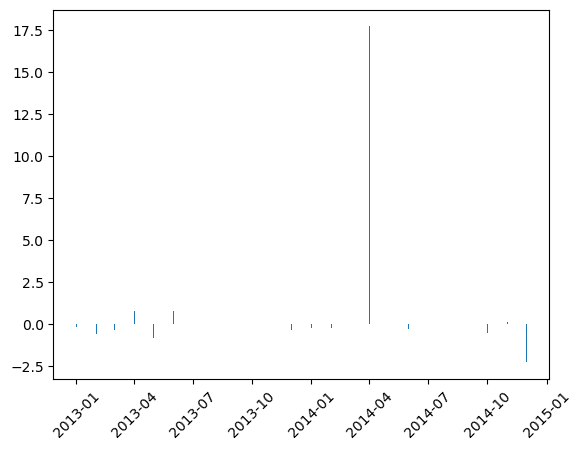

In [27]:
percDiff = (linReg.predict(XTest) - yTest) / yTest


plt.bar(yTest.index,percDiff)
plt.xticks(rotation=45)

In [30]:
from sklearn.linear_model import Lasso

lambda_hat = .00001
lassoReg = Lasso(alpha=lambda_hat, fit_intercept=True)
lassoReg.fit(X, y)

display_factor_loadings(lassoReg.intercept_, lassoReg.coef_, factorName, 'LASSO Regression with small Lambda')

,Intercept,World Equities,10-year US Treasuries,High Yield,Inflation Protection,Currency Protection
LASSO Regression with small Lambda,0.000,0.990,0.063,0.000,0.000,0.308


Cosa succede con una lambda più grande? 
Beh, può impostare quasi ogni caricamento di fattore a zero.

In [31]:
lambda_hat = .001
lassoReg = Lasso(alpha=lambda_hat, fit_intercept=True)
lassoReg.fit(X, y)

display_factor_loadings(lassoReg.intercept_, lassoReg.coef_, factorName, 'LASSO Reg with large Lambda')

,Intercept,World Equities,10-year US Treasuries,High Yield,Inflation Protection,Currency Protection
LASSO Reg with large Lambda,0.003,0.551,-0.000,0.000,0.000,-0.000


LASSO non solo può ridursi come desiderato, ma dato un lambda troppo alto, può anche scartare fattori preziosi, come dimostrato sopra.

Questo lascia la domanda centrale con la regressione LASSO. Qual è il valore appropriato di $\lambda$ e, per estensione, qual è l'insieme appropriato di fattori da includere?

### Convalida Incrociata

In pratica, la convalida incrociata seleziona il parametro di restringimento corretto $\lambda$, o nel nostro caso il valore di $\hat{\lambda}$. La convalida incrociata testa più valori diversi di $\lambda$ e seleziona il "migliore". Non daremo qui una definizione formale di convalida incrociata, ma daremo invece un'euristica.


Per prima cosa, suddividiamo il training set in $k$ sezioni chiamate fold e definiamo un elenco di N valori $\lambda$ di prova.

Prendiamo uno dei fold, lo mettilo da parte e lo etichettiamo come dato convalida. 

Combinando i $k-1$ fold rimanenti, costruiamo  un modello con ogni $\lambda$ candidato.

Questo ti dà N modelli. Calcoliamo l'errore quadratico medio di ogni modello sul fold di convalida. 

Quindi, scegliamo il fold successivo per usare una convalida.
Di nuovo, costruiamo gli N modelli diversi, uno per ogni $\lambda$, e di nuovo calcola gli errori quadratici medi sul nuovo fold di convalida. 

Lo facciamo $k$ volte, una per ognuno dei fold originali.


Alla fine, avremmo $n*k$ modelli. 
Per ogni valore di $\lambda$ avremo $k$ errori fuori campione.

Infine, seleziona il $\lambda$ che riduce al minimo l'errore medio nei campioni.

È importante notare che, una volta scelto il lambda ottimale, si va a costruire un modello finale con tutti i dati e quel valore di $\lambda$. 

Questo è il modello finale!

Non esiste una regaola su quanti fold scegliere per i nostri scopi scegliamo un valore pari a 5.
Di seguito utilizziamo la convalida incrociata per scegliere il valore lambda ottimale per lasso.

In [37]:
from sklearn.model_selection import GridSearchCV

max_lambda_hat = .001 
n_lambda_hat = 200
n_fold = 5


alphas = np.logspace(-12, np.log(max_lambda_hat), base=np.exp(1), num=n_lambda_hat)

lassoTest = Lasso(fit_intercept=True)
tuned_parameters = [{'alpha': alphas}]

clf = GridSearchCV(lassoTest, tuned_parameters, cv=n_fold, refit=True)
clf.fit(X, y)

lassoBest = clf.best_estimator_
alphaBest = clf.best_params_['alpha']

print("Best alpha parameters {0:.6f}".format(alphaBest))
display_factor_loadings(lassoBest.intercept_, lassoBest.coef_, factorName, 'CV Lasso')

Best alpha parameters 0.000017


,Intercept,World Equities,10-year US Treasuries,High Yield,Inflation Protection,Currency Protection
CV Lasso,0.000,0.977,0.036,0.000,-0.000,0.272


## Elastic Net

Ora che abbiamo discusso della convalida incrociata della regressione LASSO, parliamo più in generale delle regressioni penalizzate. È possibile mescolare e abbinare le regressioni penalizzate per creare regressioni con proprietà specifiche. Ad esempio, sappiamo dalla letteratura che la regressione LASSO può essere utilizzata per la selezione delle variabili.

Qui menzioniamo brevemente la regressione Ridge, che è una versione ancora più vecchia della regressione penalizzata. Riduce anche i carichi fattoriali, ma non li imposta a zero. La fama di Ridge è dovuta al fatto che riduce i coefficienti dei fattori altamente correlati. Ciò può essere utile se si hanno molte versioni di più o meno lo stesso fattore. Invece di trovare la "migliore versione" del fattore, si potrebbe voler utilizzare una media.

Più di recente, i professionisti hanno combinato LASSO e Ridge, chiamato Elastic Net, e può fornire i vantaggi di entrambi i metodi.

È importante notare che la penalità della regressione Ridge è più preziosa quando i fattori sono altamente correlati. In questo esempio i fattori non sono altamente correlati. Trattiamo il metodo per completezza.

Come nel precedente campione di convalida incrociata, una volta selezionati i valori ottimali di $\lambda_1$ e $\lambda_2$, costruiamo il nostro modello finale sull'intero set di addestramento, con $\lambda_1$ e $\lambda_2$ selezionati.

Di nuovo, per la nostra notazione, n è uguale al numero di punti dati e m è il numero di fattori.

$$
\begin{equation*} 
    {\hat{\beta}}^{\text{LASSO}} = argmin_{\beta}\bigg\{\sum_{t=1}^{n} (y_t - X_t^T \beta)^2 + \lambda_1 \sum_{j=1}^{m}|\beta_j| \bigg\}
\end{equation*}
$$
$$
\begin{equation*} 
    {\hat{\beta}}^{\text{Ridge}} = argmin_{\beta}\bigg\{\sum_{t=1}^{n} (y_t - X_t^T \beta)^2 + \lambda_2||\beta||_2^2 \bigg\}
\end{equation*}
$$
$$
\begin{equation*} 
    {\hat{\beta}}^{\text{Elastic Net}} = argmin_{\beta}\bigg\{\sum_{t=1}^{n} (y_t - X_t^T \beta)^2 + \lambda_1 \sum_{j=1}^{m}|\beta_j| + \lambda_2||\beta||_2^2 \bigg\}
\end{equation*}
$$

Nella nostra notazione, $||\beta||_2^2$ indica le due norme del vettore $\beta$.


In scikit-learn, la Elastic Net viene scritta in modo leggermente diverso.

$$
\begin{equation*} 
    {\hat{\beta}}^{\text{Elastic Net}} = argmin_{\beta}\bigg\{\sum_{t=1}^{n} (y_t - X_t^T \beta)^2 + \hat{\lambda}*\text{l1_ratio}\sum_{j=1}^{m}|\beta_j| + .5*\hat{\lambda}*(1-\text{l1_ratio})||\beta||_2^2 \bigg\}
\end{equation*}
$$

Qui abbiamo due parametri di restringimento $\hat{\lambda}$ e $l1_{ratio}$. $\hat{\lambda}$ ora controlla la quantità di penalizzazione che applichiamo, e $l1_{ratio}$ controlla la quantità di penalizzazione che deriva da LASSO rispetto a Ridge.

In [41]:
from sklearn.linear_model import ElasticNet

alphaMax = .01
alphas = np.logspace(-12, np.log(alphaMax), num=100)
l1RatioMax = .99
l1Ratios = np.linspace(1e-6, l1RatioMax, 20)

elasticNetTest = ElasticNet(fit_intercept=True)

tuned_parameters = [{'alpha': alphas, 'l1_ratio': l1Ratios}]

clf = GridSearchCV(elasticNetTest, tuned_parameters, cv=n_fold, refit=True)
clf.fit(X, y)

elasticNetBest = clf.best_estimator_
alphaBest = clf.best_params_['alpha']
l1RatioBest = clf.best_params_['l1_ratio']

print('Best lambda_hat {0:.6f}'.format(alphaBest))
print('Best l1 ratio {0:.6f}'.format(l1RatioBest))
    
display_factor_loadings(elasticNetBest.intercept_, elasticNetBest.coef_, factorName, 'CV Elastic Net')

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.433e-03, tolerance: 3.713e-05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.874e-04, tolerance: 4.602e-05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

Best lambda_hat 0.000018
Best l1 ratio 0.937895


,Intercept,World Equities,10-year US Treasuries,High Yield,Inflation Protection,Currency Protection
CV Elastic Net,0.000,0.976,0.036,0.000,-0.000,0.271


I risultati sono quasi identici. Solo il fattore di protezione della valuta differisce leggermente e di meno dell'1%.

### Migliore sottoinsieme 

Le regressioni penalizzate non sono l'unico tipo di regressione che possiamo eseguire.
Possiamo anche eseguire regressioni vincolate! Definiamo una regressione vincolata intuitiva chiamata "Best Subset Regression". Il suo nome è esattamente ciò che sembra. 

Tenta di trovare il modello lineare soggetto al vincolo in cui solo "x" fattori possono essere diversi da zero. 
In questo caso, "x" è un numero intero definito dall'utente.

Sia $ \text{total_vars} $ il numero di fattori considerati e $ \text{max_vars} $ il numero massimo di fattori consentiti nel modello finale.
$$
\begin{equation*} 
    {\hat{\beta}}^{\text{Best Subset}} = argmin_{\beta}\bigg\{\sum_{t=1}^{n} (y_t - X_t^T \beta)^2 \bigg\}.
\end{equation*}
$$
$$
\begin{equation*} 
    \sum_{i=1}^{\text{max_vars}} z_i \leq \text{max_vars,}  \hspace{2mm} Mz + \beta \geq 0 \text{  and  } \beta \leq Mz \text{  ,  } \textbf{z } \text{ binary}
\end{equation*}
$$


In breve, stiamo usando il vettore z per tenere traccia di quali caricamenti fattoriali il modello sceglie come diversi da zero.

Gli elementi di z possono essere solo zero o 1. Quindi il primo vincolo (a sinistra) afferma che puoi avere al massimo solo max_vars elementi di z uguali a 1.

I due vincoli successivi impongono la condizione che se un elemento di z è uguale a 0, allora il caricamento fattoriale corrispondente in $\beta$ deve essere uguale a zero. 

Il secondo vincolo afferma che se un elemento di z è uguale a zero, allora l'elemento corrispondente di $\beta$ deve essere minore o uguale a zero. 


Analogamente, il terzo vincolo afferma che se un elemento di z è uguale a zero, l'elemento corrispondente di $\beta$ deve essere maggiore o uguale a zero. Combinati, questi due vincoli implicano che l'elemento corrispondente di $\beta$ deve essere uguale a zero. Se l'elemento di z è uguale a 1, allora i vincoli dicono che l'elemento corrispondente di $\beta$ è compreso tra -M e M. Se M è sufficientemente grande, questo vincolo non è vincolante.

In [48]:
import cvxpy as cp

max_vars = 2

def best_subset(x,y,l_0):
    # Mixed Integer Programming in feature selection
    M = 1000
    n_factor = x.shape[1]
    z = cp.Variable(n_factor, boolean=True)
    beta = cp.Variable(n_factor)
    alpha = cp.Variable(1)

    def MIP_obj(x,y,b,a):
        return cp.norm(y-cp.matmul(x,b)-a,2)

    best_subset_prob = cp.Problem(cp.Minimize(MIP_obj(x, y, beta, alpha)), 
                             [cp.sum(z)<=l_0, beta+M*z>=0, M*z>=beta])
    best_subset_prob.solve(solver='ECOS_BB')
    return alpha.value, beta.value

alpha, beta = best_subset(X.values, y.values, max_vars)
#round beta values to zero
beta[np.abs(beta) <= 1e-7] = 0.0

linearSubset = LinearRegression()
linearSubset.intercept_ = alpha[0]
linearSubset.coef_ = beta

display_factor_loadings(alpha, beta, factorName, 'Best Subset with maxVars = {0}'.format(max_vars))

C:\ProgramData\anaconda3\Lib\site-packages\cvxpy\problems\problem.py:1407: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


,Intercept,World Equities,10-year US Treasuries,High Yield,Inflation Protection,Currency Protection
Best Subset with maxVars = 2,0.001,0.919,0.000,0.000,0.000,0.000


## Previsione dei rendimenti attesi

Confrontiamo cosa fanno i nostri diversi modelli. Diamo un'occhiata ai coefficienti e a quanto bene spiegano i rendimenti sul nostro set di test, e cosa prevedono per i rendimenti attesi futuri.

Di seguito sono riportate le nostre stime per i rendimenti futuri attesi dei singoli fattori. Questi sono chiamati ipotesi del mercato dei capitali e c'è molta attenzione alla stima di questi valori in uno studio di allocazione delle attività o passività delle attività. Se stiamo esaminando prodotti ibridi, il problema si semplifica notevolmente se possiamo usare le ipotesi di rendimenti prospettici per un piccolo insieme di fattori per stimare i rendimenti di un gran numero di altre attività.

Per ora, utilizzeremo le seguenti ipotesi.

 * Global Equities: 8%
 * 10-Year Treasury Bonds: 2%
 * High Yield Bonds: 5%
 * Inflation Protection: -.3%
 * Currency Protection: 0%
 
Come trasformiamo questo in un rendimento atteso annualizzato? Semplice, prendiamo la versione (mensile) dei nostri rendimenti annuali dei fattori e li usiamo come input per il nostro modello. Quindi moltiplichiamo per 12 (per annualizzare).

In [64]:
models = [linReg, lassoBest, elasticNetBest, linearSubset]

comparison = pd.DataFrame(np.zeros((4, 7)), columns=['Intercept'] + factorName + ['Implied Expected Return S&P 500 (Annual)'])
expected_returns = pd.DataFrame(np.array([.08/12, .02/12, .05/12, -.003/12, 0/12]), factorName).T

for i in range(len(models)):
    model = models[i]
    comparison.loc[i,'Intercept'] = model.intercept_
    comparison.loc[i, factorName] = model.coef_
    comparison.loc[i, 'Implied Expected Return S&P 500 (Annual)'] = 12*model.predict(expected_returns)

comparison.index = ['OLS', 'LASSO', 'Elastic Net', 'Best Subset']

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [65]:
comparison

,Intercept,World Equities,10-year US Treasuries,High Yield,Inflation Protection,Currency Protection,Implied Expected Return S&P 500 (Annual)
OLS,-0.000,1.007,0.132,-0.000,0.058,0.374,0.078
LASSO,0.000,0.977,0.036,0.000,-0.000,0.272,0.082
Elastic Net,0.000,0.976,0.036,0.000,-0.000,0.271,0.082
Best Subset,0.001,0.919,0.000,0.000,0.000,0.000,0.080


Prendiamo il modello LASSO come nostra "previsione finale" (come hanno fatto nello studio di Harvard). Abbiamo un rendimento atteso dell'S&P500 pari all'8,2%.

Questa previsione funziona bene fuori dal campione? Possiamo usare la funzione r2_score (da sklearn) per calcolare l'errore sul set di test dal nostro modello.

A quanto pare, tutti e 4 i metodi funzionano generalmente bene su questa serie. In generale, se hai i rendimenti di World Equities per spiegare i rendimenti di S&P500, la tua regressione esplicativa funzionerà bene.

Di seguito è riportato l'errore sul set di test (2013-2014).

In [66]:
predictions = pd.DataFrame(np.zeros((4,1)), columns=['R^2 on Testing Set'])

for i in range(len(models)):
    model = models[i]
    predictions.loc[i, 'R^2 on Testing Set'] = r2_score(test['SP500 Total Return'],
                                                        model.predict(test[factorName]))
predictions.index = ['OLS', 'LASSO', 'Elastic Net', 'Best Subset']

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [67]:
predictions


,R^2 on Testing Set
OLS,0.856
LASSO,0.858
Elastic Net,0.858
Best Subset,0.804


## Analisi del modello a 5 fattori di Harvard

Ora che abbiamo esaminato attentamente l'analisi per 1 classe di attività. Replichiamo (parte) dello studio Harvard 5 factor, con un set più ampio di attività.

Per ogni attività definita di seguito, eseguiamo la regressione LASSO cross-validata a 5 fold e calcoliamo i caricamenti fattoriali e l'intercetta. 

Vediamo se riusciamo a generare qualche approfondimento.

1) Azioni USA: rendimento totale di S&P 500
2) Azioni internazionali: rendimento totale di MSCI World EX US Index
3) Treasury Bond 20 anni: rendimento di 20 anni US Treasury Bond
4) Obbligazioni societarie: BofA Merrill Lynch US Corp Master Total Return Index
5) Immobiliare: US-DS Real Estate Total Return Index
6) Materie prime: rendimento totale GSCI meno T-bill
7) TIPS: Barclays US Treasury Inflation-Linked Bond Index (stesso indice di quando si calcola la protezione dall'inflazione)

In [71]:
names = ['SP500 Total Return','International Equity','U.S. Treasury 20 years', 'Corporate Bond','Real Estate', 'Commodity', 'TIPS']
expected_returns = pd.DataFrame(np.array([[.08/12, .02/12, .05/12, -.003/12, 0/12]]), columns=factorName)
factor_matrix = pd.DataFrame(np.zeros((4, 7)), columns=['Intercept'] + factorName + 
                          ['Implied Expected (Annual) Return'])



for i in range(len(names)):
    data = all_data[[names[i]] + factorName].copy()
    data = data[(data.index >= '1997-03-01') & (data.index <= '2012-12-01')].copy()
    data = data.dropna()
    
    X = data[factorName]
    y = data[names[i]]
    
    alphas = np.logspace(-12, np.log(max_lambda_hat), base=np.exp(1), num=n_lambda_hat)

    lassoTest = Lasso(fit_intercept=True)
    tuned_parameters = [{'alpha': alphas}]

    clf = GridSearchCV(lassoTest, tuned_parameters, cv=n_fold, refit=True)
    clf.fit(X, y)
    
    model = clf.best_estimator_
    
    factor_matrix.loc[i,'Intercept'] = model.intercept_
    factor_matrix.loc[i, factorName] = model.coef_
    factor_matrix.loc[i, 'Implied Expected (Annual) Return'] = 12*model.predict(expected_returns)
    
factor_matrix.index = names



In [72]:
factor_matrix

,Intercept,World Equities,10-year US Treasuries,High Yield,Inflation Protection,Currency Protection,Implied Expected (Annual) Return
SP500 Total Return,0.000,0.977,0.036,0.000,-0.000,0.272,0.082
International Equity,0.000,0.932,-0.085,0.023,-0.018,-0.323,0.077
U.S. Treasury 20 years,-0.000,-0.000,1.340,0.026,-0.000,0.098,0.025
Corporate Bond,0.002,0.081,0.566,0.074,0.234,-0.004,0.039
Real Estate,0.007,0.531,0.000,0.000,0.000,-0.000,0.123
Commodity,0.003,0.215,0.000,-0.057,0.841,-0.992,0.043
TIPS,0.000,0.002,0.958,0.000,0.939,-0.000,0.019


Cosa possiamo dire dei fattori? L'S&P 500 è fondamentalmente un'azione mondiale, ma con un piccolo carico sui titoli del Tesoro USA e un carico positivo sulla protezione valutaria. L'azione internazionale è una versione a bassa volatilità dell'azione mondiale con un carico negativo sulla protezione valutaria. Quindi diversificare su entrambi rende piatta la tua esposizione valutaria, come previsto.

Il Treasury Bond a 20 anni è essenzialmente una versione con leva del 10 anni. Il Corporate Bond Index è una combinazione del Treasury Bond a 10 anni + protezione dall'inflazione.

Ora che abbiamo una metodologia per i rendimenti attesi, tutto ciò di cui abbiamo bisogno è una misura della covarianza tra le attività e siamo pronti a eseguire la tradizionale costruzione del portafoglio di varianza media di Markowitz per risolvere il portafoglio ottimale con aggiustamento del rischio.

Nel prossimo modulo, esamineremo come fare proprio questo.